<a href="https://www.kaggle.com/code/mohamedelhawary0/classification-using-decisiontree-dnn-classifier?scriptVersionId=170505911" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Sloan Digital Sky Survey

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
%matplotlib inline

In [2]:
data = pd.read_csv("../input/Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [3]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [ ]:
# drop the object id columns, they are of no use in the analysis
data.drop(['objid','specobjid'], axis=1, inplace=True)

In [4]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


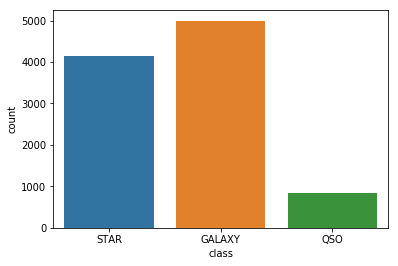

In [5]:
sns.countplot(x=data['class'])

In [7]:
def change_category_to_number(classCat):
    if classCat=='STAR':
        return 0
    elif classCat=='GALAXY':
        return 1
    else:
        return 2

In [8]:
# assign a numerical value to the categorical field of class, by using the above function
data['classCat'] = data['class'].apply(change_category_to_number)

In [9]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,classCat
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491,0
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541,0
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513,1
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510,0
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512,0


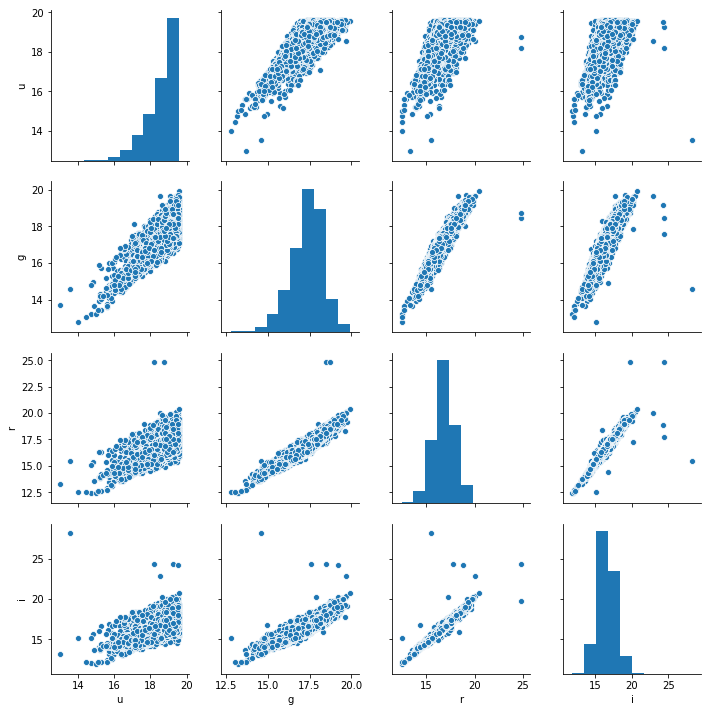

In [10]:
sns.pairplot(data[['u','g','r','i']])

In [11]:
data.drop(['run','rerun','camcol','field','class'],axis=1,inplace=True)

In [12]:
data.head()

,objid,ra,dec,u,g,r,i,z,specobjid,redshift,plate,mjd,fiberid,classCat
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,3.722360e+18,-0.000009,3306,54922,491,0
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,3.638140e+17,-0.000055,323,51615,541,0
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,3.232740e+17,0.123111,287,52023,513,1
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,3.722370e+18,-0.000111,3306,54922,510,0
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,3.722370e+18,0.000590,3306,54922,512,0


In [13]:
data.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
specobjid    float64
redshift     float64
plate          int64
mjd            int64
fiberid        int64
classCat       int64
dtype: object

In [16]:
X = data.drop('classCat', axis=1)
y = data['classCat']

### Perform train and test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

## Decision Tree Classifier

In [19]:
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,random_state=0)

In [20]:
dtClassifer.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=15,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Prediction on test data

In [21]:
prediction = dtClassifer.predict(X_test)

In [22]:
prediction[:10]

array([0, 1, 0, 0, 1, 1, 0, 2, 1, 1])

In [23]:
y_test[:10]

7054    0
4692    1
907     0
4498    0
9957    1
3341    1
7152    0
1152    2
7105    1
2066    1
Name: classCat, dtype: int64

### Measure accuracy of the classifier

In [24]:
accuracy_score(y_true=y_test, y_pred=prediction)

0.9883333333333333

## Logistic Regression Classifier

In [25]:
lrClassifier = LogisticRegression()

In [26]:
lrClassifier.fit(X_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Prediction on test data

In [27]:
prediction = lrClassifier.predict(X_test)

In [29]:
prediction[:10]

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [30]:
y_test[:10]

7054    0
4692    1
907     0
4498    0
9957    1
3341    1
7152    0
1152    2
7105    1
2066    1
Name: classCat, dtype: int64

### Measure accuracy of the model

In [31]:
accuracy_score(y_true=y_test, y_pred=prediction)

0.794

# Neural Network using Tensorflow and Keras

In [32]:
featcols = [tf.feature_column.numeric_column('ra'),
            tf.feature_column.numeric_column('dec'),
            tf.feature_column.numeric_column('u'),
            tf.feature_column.numeric_column('g'),
            tf.feature_column.numeric_column('r'),
            tf.feature_column.numeric_column('i'),
            tf.feature_column.numeric_column('z'),
            tf.feature_column.numeric_column('redshift'),
            tf.feature_column.numeric_column('plate'),
            tf.feature_column.numeric_column('mjd'),
            tf.feature_column.numeric_column('fiberid')
           ]

### Linear Classifier 

In [33]:
model = tf.estimator.LinearClassifier(n_classes=3,
                                      optimizer=tf.train.FtrlOptimizer(l2_regularization_strength=0.1,learning_rate=0.01),
                                     feature_columns=featcols)

In [34]:
data.head()

,objid,ra,dec,u,g,r,i,z,specobjid,redshift,plate,mjd,fiberid,classCat
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,3.722360e+18,-0.000009,3306,54922,491,0
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,3.638140e+17,-0.000055,323,51615,541,0
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,3.232740e+17,0.123111,287,52023,513,1
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,3.722370e+18,-0.000111,3306,54922,510,0
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,3.722370e+18,0.000590,3306,54922,512,0


In [36]:
def get_input_fn(num_epochs,n_batch,shuffle):
    return tf.estimator.inputs.pandas_input_fn(
        x=X_train,
        y=y_train,
        batch_size=n_batch,
        num_epochs=num_epochs,
        shuffle=shuffle
    )

In [40]:
model.train(input_fn=get_input_fn(100,128,True),steps=1000)

In [42]:
def evaluate_fn(num_epochs,n_batch,shuffle):
    return tf.estimator.inputs.pandas_input_fn(
        x=X_test,
        y=y_test,
        batch_size=n_batch,
        num_epochs=num_epochs,
        shuffle=shuffle
    )

In [43]:
model.evaluate(input_fn=evaluate_fn(100,128,True),steps=1000)

{'accuracy': 0.5376328,
 'average_loss': 12.4703245,
 'loss': 1596.2015,
 'global_step': 2000}

### DNN Classifier

In [46]:
dnn_model = tf.estimator.DNNClassifier(n_classes=3,
                                       feature_columns=featcols,
                                       hidden_units=[1024,512,256,32,3],
                                       activation_fn=tf.nn.relu,
                                       optimizer='Adam',
                                       dropout=0.2,
                                      )

In [47]:
dnn_model.train(input_fn=get_input_fn(100,128,True),steps=1000)

In [48]:
dnn_model.evaluate(input_fn=evaluate_fn(100,128,True),steps=1000)

{'accuracy': 0.49898437,
 'average_loss': 0.9276156,
 'loss': 118.734795,
 'global_step': 1000}

### DNN Linear Combined Classifier

In [51]:
dnnlcc_model = tf.estimator.DNNLinearCombinedClassifier(n_classes=3,dnn_activation_fn='relu',dnn_dropout=0.2,dnn_hidden_units=[1024,512,256,32,3],dnn_optimizer='Adam',dnn_feature_columns=featcols,linear_feature_columns=featcols)

In [ ]:
dnnlcc_model.train(input_fn=get_input_fn(100,128,True),steps=1000)

In [52]:
dnnlcc_model.evaluate(input_fn=evaluate_fn(100,128,True),steps=1000)

{'accuracy': 0.41234374,
 'average_loss': 1924.3754,
 'loss': 246320.05,
 'global_step': 0}

For Deep Neural Network to work better, you need more dataset.